# Data Description

Give a brief description of the dataset you are using:

In [1]:
import pandas as pd

results = pd.read_csv("Minimum_Wage_Data.csv")
results.head(10)

In [50]:
results.tail(5)

,Year,State,CPIaverage,High2018
2745,2017,Virginia,245.119583,7.41
2746,2017,Washington,245.119583,11.24
2747,2017,West Virginia,245.119583,8.94
2748,2017,Wisconsin,245.119583,7.41
2749,2017,Wyoming,245.119583,5.26


In [13]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750 entries, 0 to 2749
Data columns (total 4 columns):
Year          2750 non-null int64
State         2750 non-null object
CPIaverage    2750 non-null float64
High2018      2739 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 86.0+ KB


In [15]:
results = results.fillna(0)

In [16]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750 entries, 0 to 2749
Data columns (total 4 columns):
Year          2750 non-null int64
State         2750 non-null object
CPIaverage    2750 non-null float64
High2018      2750 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 86.0+ KB


In [9]:
results['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Federal (FLSA)', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'U.S. Virgin Islands',
       'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

### Description 

1. The data set is about minimium wage in united states for 55 states ( 50 states + District of columbia + some territories) in the years ranging from 1968 to 2017
2. The data set also consists of Consumer price index for each state for all the years. 
3. The minimum wage is calculated for all years from 1968 to 2016 is scaled to 2017 value using consumer price index. By this we can compare the minimum wage values at different years becuase all of them have been scaled to 2017 terms.
4. Original Data set has both high and low minimum wage  because some states used to have different minimum wages for different jobs and only 5 states are following it now, so I removed this column and focused only on the high minimum wage. When I say minimum wage I am referring to High minimum wage.
5. I cleaned the data set a bit and for a few states the minimum wage data in the intial years from 1968 is not available but the data set in large is complete. I converted NA values to 0.
6. for each of the 55 states there are 50 years (1968 - 2017), (2750 entries = 50*55)


In [60]:
wage_data = results

## Intents

In [42]:
!type intents.md

## intent:greet
- hey
- hello there
- hi
- hello there
- good morning
- good evening
- hey there
- let's go
- hey dude
- goodmorning
- goodevening
- good afternoon

## intent:goodbye
- see you
- good by
- cee you later
- good night
- good afternoon
- bye
- goodbye
- have a nice day
- see you around
- bye bye
- see you later
- good bye

## intent:affirm
- yes
- indeed
- of course
- that sounds good
- correct
- definitely
- absolutely
- sure
- yep

## intent:deny
- no
- never
- I don't think so
- don't like that
- no way
- not really
- nope
- definitely no
- no no

## intent:thanks
- thanks
- thank you
- thank you very much
- thanks a lot
- thank you so much
- thank you loads
- tnx

## intent: Consumer_price_for_a_year
- what is the average of consumer price index of all states in the [1993](year) ?
- In this [1999](year) I want the average of conumser price index ?
- can I get the average of the consumer price index in [2006](year) ?
- what is the mean of the consumer price index in the

## Domain

In [40]:
!type domain.yml

intents:
  - greet 
  - goodbye
  - affirm
  - deny
  - thanks
  - Consumer_price_for_a_year
  - wage_query
  - inform
  - wage_highestincrease_query

slots:
  year:
    type: float
  state:
    type: text
  yearl:
    type: float
  yearh:
    type: float

entities:
  - year
  - state
  - yearl
  - yearh

actions:
  - utter_greet
  - utter_goodbye
  - utter_sure
  - utter_ok
  - utter_np
  - utter_what_state
  - utter_what_year
  - utter_year_range
  - action_get_averageofcpi
  - action_get_wage
  - action_get_highestwage
  - action_default

templates:
  utter_greet:
    - text: "KARA: Hello!"
    - text: "KARA: Hey!!"
  utter_goodbye:
    - text: "KARA: Bye!"
  utter_sure:
    - text: "KARA: Are you sure?"
  utter_ok:
    - text: "KARA: OK"
  utter_np:
    - text: "KARA: No Problem"
  utter_what_state:
    - text: "KARA: What is the state you are interested in?"
  utter_what_year:
    - text: "KARA: What is the year you are interested in?"
  utter_year_range:
    - text: "KARA: What i

## Stories

In [43]:
!type stories.md

## Greet
* greet 
    - utter_greet

## Thanks
* thanks
    - utter_np

## Goodbye
* goodbye
    - utter_goodbye

## Path 1
* greet
    - utter_greet
* Consumer_price_for_a_year{"year": 2014}
    - action_get_averageofcpi
    - action_restart
* thanks
    - utter_np
* goodbye
    - utter_goodbye


## Path 2 
* wage_query{"state": "California", "year": 2011 }
    - action_get_wage
    - action_restart
* thanks
    - utter_np
* goodbye
    - utter_goodbye

## Path 3
* wage_query{"state": "California"}
    - utter_what_year
* inform{"year": 2011 }
    - action_get_wage
    - action_restart
* thanks
    - utter_np
* goodbye
    - utter_goodbye

## Path 4
* wage_query
    - utter_what_year
* inform{"year": 2011 }
    - utter_what_state
* inform{"state":"Oklahoma"}
    - action_get_wage
    - action_restart
* thanks
    - utter_np
* goodbye
    - utter_goodbye

## Path5
* wage_highestincrease_query{"state": "Delaware", "yearl": 1989,"yearh":2015 }
    - action_get_highestwage
    - action_re

## Actions

### The action code is commented in the bottom sections. For each of the questions the corresponding actions.py code is copied again and code is commented (##)

In [44]:
!type actions.py

from rasa_core_sdk import Action
import pandas as pd
import requests
from rasa_core.events import Restarted

wage_data = pd.read_csv("Minimum_Wage_Data.csv")
class averagecpiAction(Action):
    def name(self):
        return "action_get_averageofcpi"

    def run(self, dispatcher, tracker, domain):
        k = tracker.get_slot('year')
        k = int(k)
        try: 
            df = wage_data.groupby('Year').mean()
            
            avecpi = df.loc[k,'CPIaverage'] 
            dispatcher.utter_message("KARA: The average consumer price index for all the states in USA for the year {} is {} ".format(k,round(avecpi,2)))
        except:
            dispatcher.utter_message("KARA: I am Sorry..!!! I don't have the data for the year {}".format(k))

class WageAction(Action):
    def name(self):
        return "action_get_wage"

    def run(self, dispatcher, tracker, domain):
        y_ear = tracker.get_slot('year')
        y_ear = int(y_ear)
        s_tate = tracker.get_slot('state')
  

## Story Graph

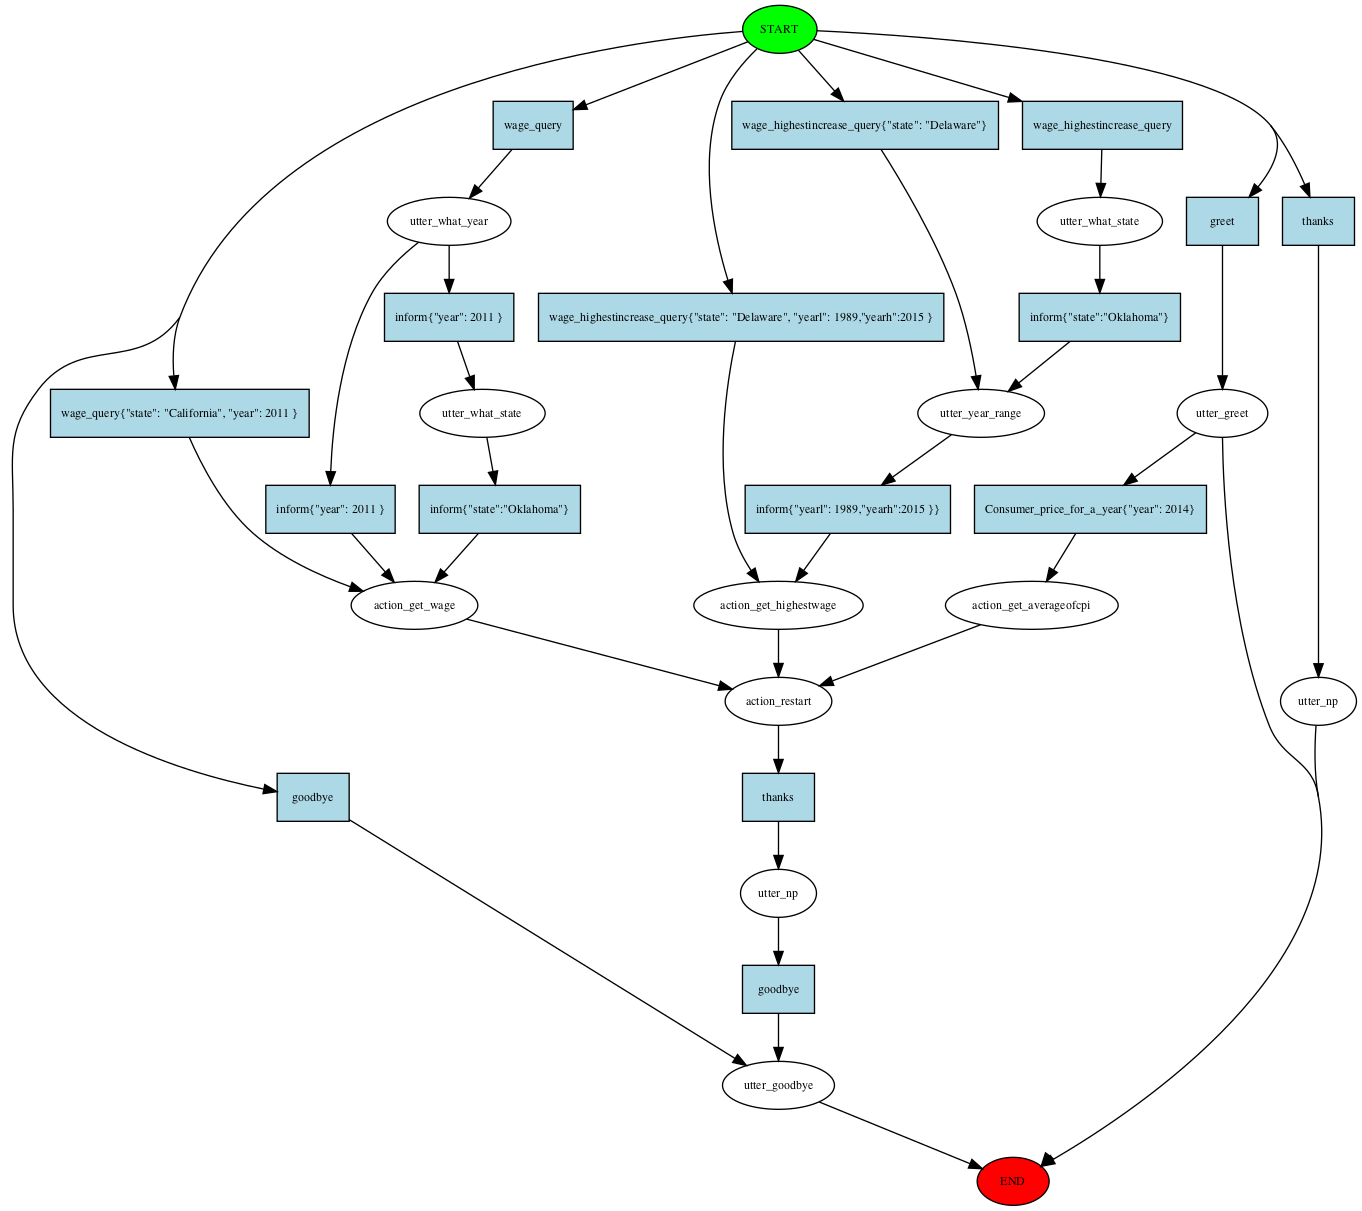

In [45]:
from IPython.display import Image
Image(filename='story_graph.png')

---

# Dialogue Model Training


In [1]:
%matplotlib inline

import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')

import sys
!{sys.executable} -m spacy download en

def pprint(o):
    # small helper to make dict dumps a bit prettier
    print(json.dumps(o, indent=2))


    Linking successful
    C:\Anaconda\envs\mie451-assignment-ci\lib\site-packages\en_core_web_sm
    -->
    C:\Anaconda\envs\mie451-assignment-ci\lib\site-packages\spacy\data\en

    You can now load the model via spacy.load('en')



C:\Anaconda\envs\mie451-assignment-ci\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
C:\Anaconda\envs\mie451-assignment-ci\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return f(*args, **kwds)


In [23]:
from rasa_nlu.training_data import load_data
from rasa_nlu.model import Trainer
from rasa_nlu import config

# loading the nlu training samples
training_data = load_data("intents.md")

# trainer to educate our pipeline
trainer = Trainer(config.load("config.yml"))

# train the model!
interpreter = trainer.train(training_data, verbose=True)

# store it for future use
model_directory = trainer.persist("models/nlu", fixed_model_name="current")

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.2s finished


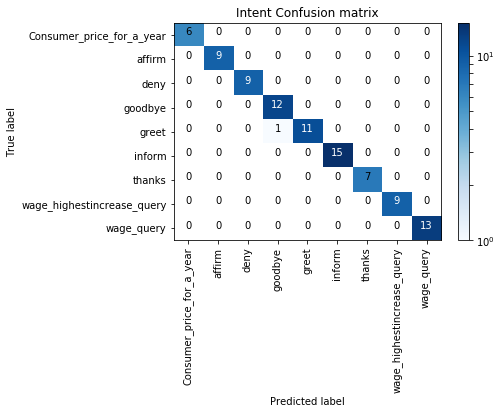

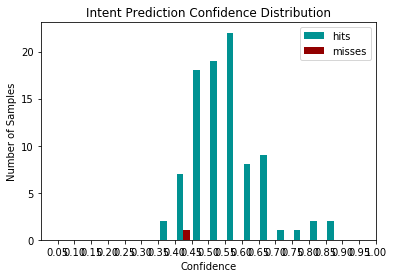

In [27]:
from rasa_nlu.evaluate import run_evaluation
run_evaluation("intents.md", model_directory)

In [10]:
#!type intents.md

In [33]:
from rasa_core.policies.fallback import FallbackPolicy
from rasa_core.policies.keras_policy import KerasPolicy
from rasa_core.agent import Agent

fallback = FallbackPolicy(fallback_action_name="action_default_fallback",
                          core_threshold=0.3,
                          nlu_threshold=0.5)

agent = Agent("domain.yml", policies=[KerasPolicy(), fallback])

In [34]:
from rasa_core.policies import KerasPolicy, MemoizationPolicy
from rasa_core.agent import Agent

agent = Agent('domain.yml', policies=[MemoizationPolicy(), KerasPolicy()])

# loading our training dialogues
training_data = agent.load_data('stories.md')

agent.train(
    training_data,
    validation_split=0.0,
    epochs=200
)

agent.persist('models/dialogue')

Processed Story Blocks: 100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 54.95it/s, # trackers=13]
Processed actions: 590it [00:03, 161.91it/s, # examples=590]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 5, 32)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 15)                495       
_________________________________________________________________
activation (Activation)      (None, 15)                0         
Total params: 8,815
Trainable params: 8,815
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
590/590 [==============================] - ETA: 29s - loss: 2.7135 - acc: 0.06 - ETA: 6s - loss: 2.6657 - acc: 0.1641 - ETA: 2s - loss: 2.6279 - acc: 0.218 - ETA: 0s - loss: 2.5942 - acc: 0.257 - ETA: 0s - loss: 2.5554 - acc: 0.291 - 2s 3ms/step - loss: 2.5513

---
# Interaction Demo

Provide the required sections as described in the handout.

### Introdcution:

The bot name is KARA and it can help people with data regarding to minimum wage in united states for last 50 years. Each conversation starts with 'Hi' and ends with 'bye'.

## Q1

In [15]:
import IPython
from IPython.display import clear_output
from rasa_core.agent import Agent
from rasa_core.interpreter import NaturalLanguageInterpreter
from rasa_core.utils import EndpointConfig

messages = ["Hi! you can chat in this window. Type 'stop' to end the conversation."]
interpreter = NaturalLanguageInterpreter.create('models/nlu/default/current/')
endpoint = EndpointConfig('http://localhost:5055/webhook')
agent = Agent.load('models/dialogue', interpreter=interpreter, action_endpoint = endpoint)
tracker = agent.tracker_store.get_or_create_tracker("sender_id") 
# get current tracker state
tracker.current_state()

print("Your bot KARA is ready to talk about minimum wage! Type your inquiries here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    #pprint(interpreter.parse(a))
    responses = agent.handle_text(a)
    for response in responses:
        print(response["text"])

INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.


Your bot KARA is ready to talk about minimum wage! Type your inquiries here or send 'stop'
hi
KARA: Hey!!
what is the average of consumer price index in the year 1969 ?
KARA: The average consumer price index for all the states in USA for the year 1969 is 36.68 
thanks
KARA: No Problem
bye
KARA: Bye!
hi
KARA: Hey!!
what is the average of consumer price index in the year 2017 ?
KARA: The average consumer price index for all the states in USA for the year 2017 is 245.12 
thanks
KARA: No Problem
what is the average of consumer price index for all the states in the year 2019 ?
KARA: I am Sorry..!!! I don't have the data for the year 2019
thanks
KARA: No Problem
bye
KARA: Bye!
stop


### Explanation

In the above conversation we can see three queries:

Query 1. what is the average of consumer price index in the year 1969 ?: 
I am asking for the average consumer price index of all states in the USA for the year 1969. The answwer is 36.68

Query 2. what is the average of consumer price index in the year 2017 ?: 
Similar to above. 

Query 3. what is the average of consumer price index for all the states in the year 2019 ?: 
As the dataset consists only the years from 1968 to 2017 the bot replies saying that it doesn't have the data. Of course 2019 is yet to come..!!!

#### Slot fillers:

1. Year

Once we get the year the bot will filter out the data belonging to the specific year and calculates the mean CPI.

#### Corresponding Path:

In all the three queries there is only one path to follow (Path1)

Path 1
* greet
    - utter_greet
* Consumer_price_for_a_year{"year": 2014}
    - action_get_averageofcpi
    - action_restart
* thanks
    - utter_np
* goodbye
    - utter_goodbye
    

#### Corresponding Action:

class averagecpiAction(Action):

    def name(self):
        return "action_get_averageofcpi"

    def run(self, dispatcher, tracker, domain):
        
        ## k variable stores the slot year value
        
        k = tracker.get_slot('year')
        k = int(k)
        try: 
        
        ## Now grouping all the entires according to the year and storing it in a new dataframe 'df' with mean values                    
            df = wage_data.groupby('Year').mean()
            
        ## Getting the average consumer price index value corresponding to the year        
            avecpi = df.loc[k,'CPIaverage'] 
            dispatcher.utter_message("KARA: The average consumer price index for all the states in USA for the year {} is {} ".format(k,round(avecpi,2)))
        except:
            dispatcher.utter_message("KARA: I am Sorry..!!! I don't have the data for the year {}".format(k))


### Important:

I could also remove the thanks and good bye intent at the end of paths because we already had them seperately but, I choose to do it because in later questions it will help in clealry identifying that I am starting a new path/query

## Q2

In [12]:
import IPython
from IPython.display import clear_output
from rasa_core.agent import Agent
from rasa_core.interpreter import NaturalLanguageInterpreter
from rasa_core.utils import EndpointConfig


messages = ["Hi! you can chat in this window. Type 'stop' to end the conversation."]
interpreter = NaturalLanguageInterpreter.create('models/nlu/default/current/')
endpoint = EndpointConfig('http://localhost:5055/webhook')
agent = Agent.load('models/dialogue', interpreter=interpreter, action_endpoint = endpoint)
tracker = agent.tracker_store.get_or_create_tracker("sender_id") 
# get current tracker state
tracker.current_state()

print("Your bot KARA is ready to talk about minimum wage! Type your inquiries here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    #pprint(interpreter.parse(a))
    responses = agent.handle_text(a)
    for response in responses:
        print(response["text"])

Your bot KARA is ready to talk about minimum wage! Type your inquiries here or send 'stop'
hi
KARA: Hello!
give me the minimum wage data for Texas in 2012
KARA: The minimum wage for the texas in the year 2012 is 7.91 dollars
thanks
KARA: No Problem
bye
KARA: Bye!
hi
KARA: Hello!
do you have minimum wage data on New York ?
KARA: What is the year you are interested in?
2000
KARA: The minimum wage for the new york in the year 2000 is 6.18 dollars
thanks
KARA: No Problem
bye
KARA: Bye!
hi
KARA: Hello!
do you have minimum wage data ?
KARA: What is the year you are interested in?
1998
KARA: What is the state you are interested in?
Ohio
KARA: The minimum wage for the ohio in the year 1998 is 6.53 dollars
thanks
KARA: No Problem
bye
KARA: Bye!
give the minimum wage dat for Texas in the year 1967
KARA: I am Sorry..!!! I don't have the data for the year 1967
thanks
KARA: No Problem
bye
KARA: Bye!
stop


### Explanation Query 1

give me the minimum wage data for Texas in 2012

KARA: The minimum wage for the texas in the year 2012 is 7.91 dollars

I asked the bot to give me the minimum wage in the state of Texas for the year 2012 and it replied by saying it is 7.91 dollars. (this can be checked in the data set for the column High2018)

#### Slot Fillers

1. state(texas) 
2. year(2012). 

With these two entities the bot can look in to the corresponding element in the dataset. This remains same for all the three paths in this conversation.

#### Corresponding Path

Path 2 

* wage_query{"state": "California", "year": 2011 }
    - action_get_wage
    - action_restart
* thanks
    - utter_np
* goodbye
    - utter_goodbye
    
#### Corresponding Action

class WageAction(Action):

    def name(self):
        return "action_get_wage"

    def run(self, dispatcher, tracker, domain):
    
        ## Storing the Slots fillers in to the variables y_ear and s_tate
        y_ear = tracker.get_slot('year')
        y_ear = int(y_ear)
        s_tate = tracker.get_slot('state')
        
        try:
        ## Now using the 'y_ear' varaible entries correspondig to this year are stored in new data frame df1
            df1 = wage_data.loc[wage_data['Year'] == y_ear]
            
        ## In df1 indentifying the wage using the 's_tate' variable
            wage = df1.loc[df1['State'].str.lower() == s_tate, 'High2018'].item()

            dispatcher.utter_message("KARA: The minimum wage for the {} in the year {} is {} dollars".format(s_tate,y_ear,wage))
        except:
            dispatcher.utter_message("KARA: I am Sorry..!!! I don't have the data for the year {}".format(y_ear))

### Explanation Query 2

do you have minimum wage data on New York ?

KARA: What is the year you are interested in?

2000

KARA: The minimum wage for the new york in the year 2000 is 6.18 dollars

I asked the bot to give me the minimum wage data of state of New York and the bot immediately replied to me asking what is the year for which I need the minimum wage data. I said 2000 and it replied by saying 6.18 dollars. (same can be checked from the data set).

#### Slot Fillers

similar to Query 1

#### Corresponding Path

Path 3
* wage_query{"state": "California"}
    - utter_what_year
* inform{"year": 2011 }
    - action_get_wage
    - action_restart
* thanks
    - utter_np
* goodbye
    - utter_goodbye

#### Corresponding Action

Same as Query 1

### Explanation Query 3

do you have minimum wage data ?

KARA: What is the year you are interested in?

1998

KARA: What is the state you are interested in?

Ohio

KARA: The minimum wage for the ohio in the year 1998 is 6.53 dollars

I was inquiring if the bot has minimum wage data and the reply is what is the year I am looking for. I said 1998 and the bot is asking for the state and my reply was Ohio. The bot printed the result which is 6.53 dollars.

#### Slot Fillers
similart to Query 1

#### Corresponding Path

Path 4
* wage_query
    - utter_what_year
* inform{"year": 2011 }
    - utter_what_state
* inform{"state":"Oklahoma"}
    - action_get_wage
    - action_restart
* thanks
    - utter_np
* goodbye
    - utter_goodbye
    
#### Corresponding Action
Same as Query 1

### Explanation Query 4

give the minimum wage dat for Texas in the year 1967

KARA: I am Sorry..!!! I don't have the data for the year 1967

I inquired for the wage in 1967 but the bot replied saying it doesn't have the data

## Q3

In [38]:
import IPython
from IPython.display import clear_output
from rasa_core.agent import Agent
from rasa_core.interpreter import NaturalLanguageInterpreter
from rasa_core.utils import EndpointConfig


messages = ["Hi! you can chat in this window. Type 'stop' to end the conversation."]
interpreter = NaturalLanguageInterpreter.create('models/nlu/default/current/')
endpoint = EndpointConfig('http://localhost:5055/webhook')
agent = Agent.load('models/dialogue', interpreter=interpreter, action_endpoint = endpoint)
tracker = agent.tracker_store.get_or_create_tracker("sender_id") 
# get current tracker state
tracker.current_state()

print("Your bot KARA is ready to talk about minimum wage! Type your inquiries here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    #pprint(interpreter.parse(a))
    responses = agent.handle_text(a)
    for response in responses:
        print(response["text"])

Your bot KARA is ready to talk about minimum wage! Type your inquiries here or send 'stop'
hi
KARA: Hello!
In between 2001 to 2016 I would like to know in which year there is highest percent increase in minimum wage for Wisconsin
KARA: The wisconsin had highest minimum wage increase in the year 2007 (7.85 dollars) from the year2006 (7.08 dollars) and the percent change is 9.81
thanks
KARA: No Problem
bye
KARA: Bye!
hi
KARA: Hey!!
In which year the New jersey had highest percent increase in the minimum wage rate ?
KARA: What is the range of the years you want me to consider ?
1981 - 2011
KARA: The new jersey had highest minimum wage increase in the year 2006 (7.64 dollars) from the year2005 (6.6 dollars) and the percent change is 13.61
thanks
KARA: No Problem
bye
KARA: Bye!
hi
KARA: Hello!
Hey I am interested in knowing in which year there is greatest increase in the minimum wage rate ?  
KARA: What is the state you are interested in?
Virginia
KARA: What is the range of the years you wa

### Explanation Query1

In between 2001 to 2016 I would like to know in which year there is highest percent increase in minimum wage for Wisconsin

KARA: The wisconsin had highest minimum wage increase in the year 2007 (7.85 dollars) from the year2006 (7.08 dollars) and the percent change is 9.81

I asked the bot in between the years 2001 to 2016 when there is highest increase (year to year) in minimum wage. The bot replied saying from 2006 to 2007 there is highest increase in minimum wage comparision to all other years in the given range for the state of wisconsin.

#### slot fillers

1. State (Wisconsin)
2. Lower year in the range (2001)
3. Higher year in the range (2016)

#### Corresponding Path

Path5

* wage_highestincrease_query{"state": "Delaware", "yearl": 1989,"yearh":2015 }
    - action_get_highestwage
    - action_restart
* thanks
    - utter_np
* goodbye
    - utter_goodbye
    
#### Corresponding Action

class WagehighestAction(Action):

    def name(self):
        return "action_get_highestwage"

    def run(self, dispatcher, tracker, domain):
    
        ## Storing the three slot filelrs in to three variables
        ## y_earl stores the lowest year in the range
        y_earl = tracker.get_slot('yearl')
        y_earl = int(y_earl)
        ## y_earh stores the highest year in the given range
        y_earh = tracker.get_slot('yearh')
        y_earh = int(y_earh)
        ## s_tate stores the state
        s_tate = tracker.get_slot('state')

        try:        
            ## First making a datafraem 'df' which only consiste entries of the particular s_tate
            
            df = wage_data[wage_data['State'].str.lower() == s_tate]
            df = df.reset_index(drop = True)
            df.loc[0,'percentchange'] = 0
            
            ## Now in  'df' I created a new column which calculates the percentage change in minimum wage  from previous year to the present year. 
            
            for i in range(1,len(df)):
                df.loc[i,'percentchange'] = (df.loc[i,'High2018'] - df.loc[i-1,'High2018'])/((df.loc[i,'High2018']*0.01)+0.00001)
                
            ## in some entries there is a value of zero for minimum wage so, the percent change for next year would be 100%, I made them zero
            df.loc[(df['percentchange']) > 99] = 0
            
            ## Now after calculating the percent change I am only interested in the entries which are in the range the user inputs
            
            df = df[(df['Year'] >= y_earl) & (df['Year'] <= y_earh)]
            
            ## Now I pick the one with highest percent by sort the dataframe by percentchange column
            
            df = df.sort_values(by='percentchange', ascending=False)            
            df = df.reset_index(drop = True)
            year1 = df.loc[0,'Year']
            
            ## I store other required values such as wages in present and previous year to display the result.
            
            wage1 = df.loc[df['Year'] == year1, 'High2018'].item()
            percent1 = df.loc[df['Year'] == year1, 'percentchange'].item()
            year2 = year1 - 1
            wage2 = df.loc[df['Year'] == year2, 'High2018'].item()
            dispatcher.utter_message("KARA: The {} had highest minimum wage increase in the year {} ({} dollars) from the year{} ({} dollars) and the percent change is {}".format(s_tate,year1,wage1,year2,wage2,round(percent1,2)))
        except:
            dispatcher.utter_message("KARA: I am Sorry..!!! I only have the data for the years between 1969 and 2017")
           

### Explanation Query2

In which year the New jersey had highest percent increase in the minimum wage rate ?

KARA: What is the range of the years you want me to consider ?

1981 - 2011

KARA: The new jersey had highest minimum wage increase in the year 2006 (7.64 dollars) from the year2005 (6.6 dollars) and the percent change is 13.61


I asked the bot information regarding the New Jersey and the bot replied by asking the range of years I am interested in. I said 1981 - 2011 and the reply is the highest increase in minimum wage is from 2005 to 2006.

#### slot fillers

Similar to query 1

#### Corresponding Path

Path6
* wage_highestincrease_query{"state": "Delaware"}
    - utter_year_range
* inform{"yearl": 1989,"yearh":2015 }}
    - action_get_highestwage
    - action_restart
* thanks
    - utter_np
* goodbye
    - utter_goodbye

#### Corresponding Action
same as query 1 

### Explanation Query3

Hey I am interested in knowing in which year there is greatest increase in the minimum wage rate ?  

KARA: What is the state you are interested in?

Virginia

KARA: What is the range of the years you want me to consider ?

2008 to 2016

KARA: The virginia had highest minimum wage increase in the year 2009 (7.64 dollars) from the year2008 (6.8 dollars) and the percent change is 10.99

Here I said I am interested in knowing about change in minimum wage rate for year to year and the bot inquired about the state first and year range next. After replying 'Virginia' and 2008 to 2016 to the bot the bot said the highest increase is in the year 2009 from 2008.

#### slot fillers

Similar to Query 1

#### Corresponding Path

Path7
* wage_highestincrease_query
    - utter_what_state
* inform{"state":"Oklahoma"}
    - utter_year_range
* inform{"yearl": 1989,"yearh":2015 }}
    - action_get_highestwage
    - action_restart
* thanks
    - utter_np
* goodbye
    - utter_goodbye


#### Corresponding Action

Same as Query 1